### **Random Forest Classifier with Cross-Validation**

We decided to use **Random Forest Classifier (RFC)**, a machine learning algorithm that combines the output of multiple decision trees to reach a single result for better classification. Hoping to increase accuracy in all fields with the aim especially to increase classification accuracy and reduce FNR.

**Cross-validation** in random forests is a critical tool for model evaluation, hyperparameter tuning, and variance reduction, ultimately leading to more accurate and robust predictive models.


In [47]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(cleandata['diagnosis'])
X = pd.DataFrame(cleandata[["area_worst", "concavity_worst", "concave points_worst"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [48]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2,7)}             # depth of trees 2, 3, 4, 5, 6, 7

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.diagnosis.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [49]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=3, n_estimators=300)
0.9577291381668948


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9647887323943662

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.958041958041958



<Axes: >

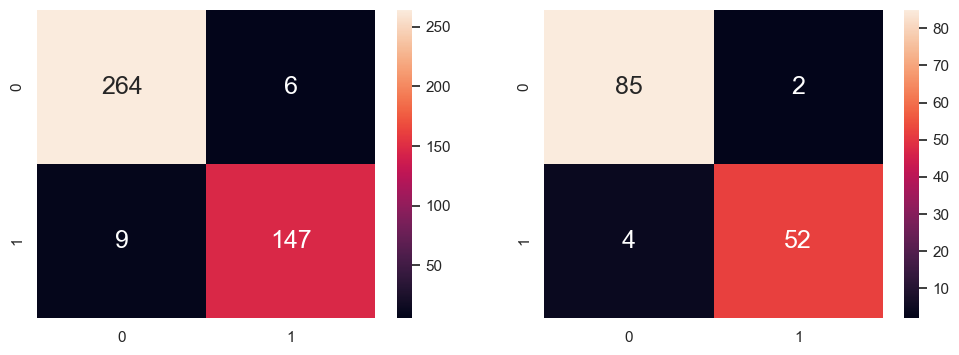

In [50]:
# Import essential models and functions from sklearn
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

# Extract Response and Predictors
y = pd.DataFrame(cleandata['diagnosis'])
X = pd.DataFrame(cleandata[["area_worst", "concavity_worst", "concave points_worst"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 300,  # n_estimators denote number of trees
                                 max_depth = 3)       # set the maximum depth of each tree


# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.diagnosis.ravel())

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])





In [51]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9647887323943662

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.958041958041958

TPR Train :	 0.9423076923076923
TNR Train :	 0.9777777777777777

FPR Train :	 0.022222222222222223
FNR Train :	 0.057692307692307696

TPR Test :	 0.9285714285714286
TNR Test :	 0.9770114942528736

FPR Test :	 0.022988505747126436
FNR Test :	 0.07142857142857142


### Evaluation of results:

First of all, it is obvious to observe that there is a **great improvement in classification accuracy**, which reaches around 0.958.

We even **improved our true positive and negative rates** as well which are 0.929 and 0.977 respectively.

This model also provides us with the **lowest FNR** (0.071) among all models we discovered, and there are also improvements on other performance metrics too.

By evaluating and analysing all the models we created, this model gives us the highest accuracy and minimal FPR and FNR, proving that:

**Random Forest Classifier with CV** -- the best prediction model our team has discovered on our project.


### Conclusion:

We started off with the aim to use variables that yield the highest accuracy and least error to predict whether the tumour is benign or malignant. With the aggressive analysis and variety of models discovered, we finally used the 3 variables of concavity_worst, concave points_worst and area_worst and a Random Forest Classifier with Cross-Validation to yield a high accuracy in predicting whether a tumour is benign or malignant

Thus, we achieved our aim and addressed our problem statement. With the motive to use data analysis to allow early detection, we used the cancer dataset to create a model to predict whether a tumour is benign or malignant successfully.
